**Problem Statement**

**Prediction Salary** 

# Import

In [6]:
#data stuff
import pandas as pd

#Modelling
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.feature_extraction import text
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, auc

#other
from tqdm import tqdm_notebook
from datetime import datetime, timedelta


import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns

# Load raw data

- including other jobs

In [60]:
data = pd.read_csv('./data/san-francisco-payroll_2011-2019.csv',low_memory=False)
data['Employee Name'] = data['Employee Name'].apply(lambda x: x.upper())
data['Job Title'] = data['Job Title'].apply(lambda x: x.upper())
data

,Employee Name,Job Title,Base Pay,Overtime Pay,Other Pay,Benefits,Total Pay,Total Pay & Benefits,Year,Status
0,JANET LEE MILLER,COURT STAFF ATTORNEY II,0.0,0.0,0.0,0.0,0.00,0.00,2019,PT
1,GARY MAR,ELECTRICAL TRANSIT SYSTEM MECH,97354.53,6996.5,2380.0,38855.9,106731.03,145586.93,2019,FT
2,CHECIL A SALVOSA,LICENSED VOCATIONAL NURSE,86118.0,17212.96,7272.08,34942.38,110603.04,145545.42,2019,FT
3,KRISTIAN C SMOCK,"STATIONARY ENG, SEWAGE PLANT",106816.03,0.0,0.0,38729.65,106816.03,145545.68,2019,FT
4,YUN Y CHANG,PHARMACY TECHNICIAN,94039.13,14947.99,1241.69,35330.26,110228.81,145559.07,2019,FT
...,...,...,...,...,...,...,...,...,...,...
357402,HOWARD CHUCK,CUSTODIAN,46106.73,890.49,4839.07,Not Provided,51836.29,51836.29,2011,NaN
357403,BING KEUNG MAK,CUSTODIAN,48472.4,1972.35,1390.5,Not Provided,51835.25,51835.25,2011,NaN
357404,QIN MING ZHU,CUSTODIAN,46046.29,1853.97,3934.44,Not Provided,51834.70,51834.70,2011,NaN
357405,JOSE ALONZO,CUSTODIAN,47798.87,0.0,4032.55,Not Provided,51831.42,51831.42,2011,NaN


# filter only medical jobs

In [62]:
KEYWORDS = ['NURS']

def filter_job(jobtitle):
    for word in KEYWORDS:
        if word.upper() in jobtitle:
            return True
    return False

data = data[data['Job Title'].map(filter_job)].reset_index(drop=True)
data

,Employee Name,Job Title,Base Pay,Overtime Pay,Other Pay,Benefits,Total Pay,Total Pay & Benefits,Year,Status
0,CHECIL A SALVOSA,LICENSED VOCATIONAL NURSE,86118.0,17212.96,7272.08,34942.38,110603.04,145545.42,2019,FT
1,BRENT LEE,SPECIAL NURSE,118057.22,7886.46,18151.77,1440.96,144095.45,145536.41,2019,PT
2,ANGELO D QUIOC,LICENSED VOCATIONAL NURSE,80359.21,32594.24,250.0,32412.48,113203.45,145615.93,2019,FT
3,LALAINE G SALARDA,NURSING ASSISTANT,80322.5,24657.58,6328.96,33617.75,111309.04,144926.79,2019,FT
4,SARA B COLE,REGISTERED NURSE,103416.69,0.0,499.97,41061.6,103916.66,144978.26,2019,PT
...,...,...,...,...,...,...,...,...,...,...
33460,MARYLIN TAYLOR,NURSES STAFFING ASSISTANT,49887.31,1540.98,602.3,Not Provided,52030.59,52030.59,2011,NaN
33461,LINDA GACULA,SPECIAL NURSE,46520.09,0.0,5539.64,Not Provided,52059.73,52059.73,2011,NaN
33462,ELSIE ZARZA,SPECIAL NURSE,47703.18,1860.43,2238.11,Not Provided,51801.72,51801.72,2011,NaN
33463,EMELITA HATHAWAY,SPECIAL NURSE,48237.46,915.9,2650.28,Not Provided,51803.64,51803.64,2011,NaN


In [63]:
jobs = data['Job Title'].value_counts()
jobs

SPECIAL NURSE                     13928
REGISTERED NURSE                  11939
LICENSED VOCATIONAL NURSE          2013
NURSE PRACTITIONER                 1990
NURSING ASSISTANT                  1228
NURSE MANAGER                       799
PUBLIC HEALTH NURSE                 523
NURSING SUPERVISOR                  411
CLINICAL NURSE SPECIALIST           196
NURSES STAFFING ASSISTANT           188
NURSE MIDWIFE                       152
NURSERY SPECIALIST                   53
NURSING SUPERVISOR PSYCHIATRIC       26
CHIEF NURSERY SPECIALIST             15
OPERATING ROOM NURSE                  4
Name: Job Title, dtype: int64

# EDA

In [54]:
data["Employee Name"].value_counts()

AMELIE E BULLARD         25
MARIBEL AMODO            23
JENNIFER J CHIU          21
SHINO HONDA              21
YING F HE                21
                         ..
JOYETTE V SMALL           1
KATHRYN H STANLEY         1
JACQUELINE N CARVAJAL     1
SURINDER K BAL            1
MAUREEN MCDONALD          1
Name: Employee Name, Length: 6585, dtype: int64

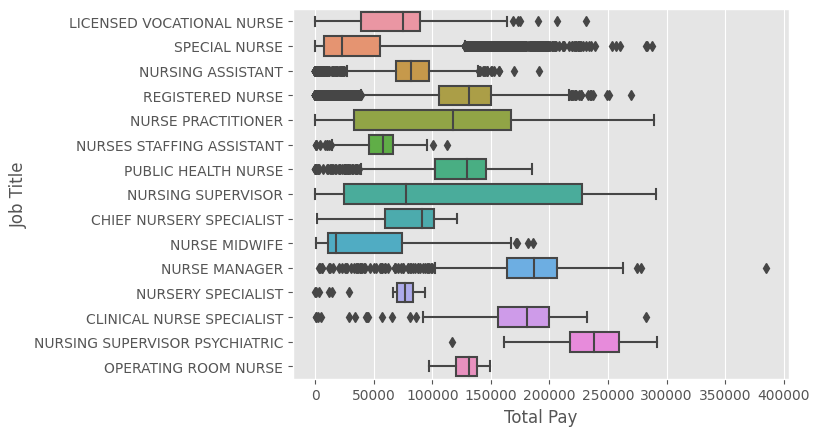

In [51]:
sns.boxplot(x='Total Pay',y='Job Title', data=data);

In [76]:
NURSES = ['REGISTERED NURSE',
'LICENSED VOCATIONAL NURSE',
'NURSING ASSISTANT',
'NURSE MANAGER',
'PUBLIC HEALTH NURSE']
data = rawdata[rawdata['Job Title'].isin(NURSES)].reset_index(drop=True)
data

NameError: name 'rawdata' is not defined

In [64]:
data.Year.value_counts()

2019    4037
2018    3912
2017    3906
2016    3844
2015    3674
2014    3576
2012    3556
2013    3551
2011    3409
Name: Year, dtype: int64

In [65]:
data.groupby(by='Employee Name').count() > 5

,Job Title,Base Pay,Overtime Pay,Other Pay,Benefits,Total Pay,Total Pay & Benefits,Year,Status
Employee Name,,,,,,,,,
AACE WU,False,False,False,False,False,False,False,False,False
AARON CRAMER,False,False,False,False,False,False,False,False,False
AARON D LOUKONEN,False,False,False,False,False,False,False,False,False
AARON LOUKONEN,False,False,False,False,False,False,False,False,False
AARON LY,True,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...
ZHIHONG LIN,False,False,False,False,False,False,False,False,False
ZIYING TAN,False,False,False,False,False,False,False,False,False
ZOHRA AKBARI,False,False,False,False,False,False,False,False,False


In [66]:
data['Employee Name']=data['Employee Name'].map(str.upper).map(str.strip).replace('  ',' ', regex=True).replace('[^A-Za-z0-9 ]', '', regex=True)
data['Job Title']=data['Job Title'].map(str.upper).map(str.strip).replace('  ',' ', regex=True).replace('[^A-Za-z ]', '', regex=True)
data

,Employee Name,Job Title,Base Pay,Overtime Pay,Other Pay,Benefits,Total Pay,Total Pay & Benefits,Year,Status
0,CHECIL A SALVOSA,LICENSED VOCATIONAL NURSE,86118.0,17212.96,7272.08,34942.38,110603.04,145545.42,2019,FT
1,BRENT LEE,SPECIAL NURSE,118057.22,7886.46,18151.77,1440.96,144095.45,145536.41,2019,PT
2,ANGELO D QUIOC,LICENSED VOCATIONAL NURSE,80359.21,32594.24,250.0,32412.48,113203.45,145615.93,2019,FT
3,LALAINE G SALARDA,NURSING ASSISTANT,80322.5,24657.58,6328.96,33617.75,111309.04,144926.79,2019,FT
4,SARA B COLE,REGISTERED NURSE,103416.69,0.0,499.97,41061.6,103916.66,144978.26,2019,PT
...,...,...,...,...,...,...,...,...,...,...
33460,MARYLIN TAYLOR,NURSES STAFFING ASSISTANT,49887.31,1540.98,602.3,Not Provided,52030.59,52030.59,2011,NaN
33461,LINDA GACULA,SPECIAL NURSE,46520.09,0.0,5539.64,Not Provided,52059.73,52059.73,2011,NaN
33462,ELSIE ZARZA,SPECIAL NURSE,47703.18,1860.43,2238.11,Not Provided,51801.72,51801.72,2011,NaN
33463,EMELITA HATHAWAY,SPECIAL NURSE,48237.46,915.9,2650.28,Not Provided,51803.64,51803.64,2011,NaN


In [67]:
df=data[['Employee Name', 'Job Title', 'Total Pay & Benefits', 'Year', 'Status']]
df.columns=['Employee Name', 'Job Title', 'Salary', 'Year', 'Status']
df=df[df['Salary']!=0.0]
df

,Employee Name,Job Title,Salary,Year,Status
0,CHECIL A SALVOSA,LICENSED VOCATIONAL NURSE,145545.42,2019,FT
1,BRENT LEE,SPECIAL NURSE,145536.41,2019,PT
2,ANGELO D QUIOC,LICENSED VOCATIONAL NURSE,145615.93,2019,FT
3,LALAINE G SALARDA,NURSING ASSISTANT,144926.79,2019,FT
4,SARA B COLE,REGISTERED NURSE,144978.26,2019,PT
...,...,...,...,...,...
33460,MARYLIN TAYLOR,NURSES STAFFING ASSISTANT,52030.59,2011,NaN
33461,LINDA GACULA,SPECIAL NURSE,52059.73,2011,NaN
33462,ELSIE ZARZA,SPECIAL NURSE,51801.72,2011,NaN
33463,EMELITA HATHAWAY,SPECIAL NURSE,51803.64,2011,NaN


In [68]:
start_salary=df.sort_values(by='Year').groupby(by='Employee Name').agg({'Salary':'first', 'Year':'first'}).reset_index()
start_salary.columns=['Employee Name', 'Start Salary', 'Start Year']
start_salary

,Employee Name,Start Salary,Start Year
0,AACE WU,121348.48,2018
1,AARON CRAMER,106385.49,2011
2,AARON D LOUKONEN,139451.59,2013
3,AARON LOUKONEN,110244.08,2012
4,AARON LY,27667.18,2014
...,...,...,...
6580,ZHIHONG LIN,33983.56,2015
6581,ZIYING TAN,52167.45,2017
6582,ZOHRA AKBARI,24536.70,2018
6583,ZOSIMA P PANGILINAN,107608.78,2013


In [69]:
merge_df=df.merge(start_salary, on ='Employee Name', how='left').sort_values(['Employee Name','Year']).reset_index(drop=True)
merge_df.columns=['Employee Name', 'Job Title', 'End Salary', 'End Year', 'Status','Start Salary', 'Start Year']
merge_df

,Employee Name,Job Title,End Salary,End Year,Status,Start Salary,Start Year
0,AACE WU,REGISTERED NURSE,121348.48,2018,PT,121348.48,2018
1,AACE WU,REGISTERED NURSE,86623.20,2019,PT,121348.48,2018
2,AARON CRAMER,REGISTERED NURSE,106385.49,2011,NaN,106385.49,2011
3,AARON CRAMER,SPECIAL NURSE,23108.64,2011,NaN,106385.49,2011
4,AARON CRAMER,REGISTERED NURSE,173747.94,2012,NaN,106385.49,2011
...,...,...,...,...,...,...,...
33453,ZOSIMA P PANGILINAN,NURSING ASSISTANT,108824.77,2017,FT,107608.78,2013
33454,ZOSIMA P PANGILINAN,NURSING ASSISTANT,124500.40,2018,FT,107608.78,2013
33455,ZOSIMA P PANGILINAN,NURSING ASSISTANT,79010.87,2019,PT,107608.78,2013
33456,ZOSIMA PANGILINAN,NURSING ASSISTANT,71418.77,2011,NaN,71418.77,2011


In [70]:
merge_df['Total Year']=merge_df['End Year']-merge_df['Start Year']
merge_df

,Employee Name,Job Title,End Salary,End Year,Status,Start Salary,Start Year,Total Year
0,AACE WU,REGISTERED NURSE,121348.48,2018,PT,121348.48,2018,0
1,AACE WU,REGISTERED NURSE,86623.20,2019,PT,121348.48,2018,1
2,AARON CRAMER,REGISTERED NURSE,106385.49,2011,NaN,106385.49,2011,0
3,AARON CRAMER,SPECIAL NURSE,23108.64,2011,NaN,106385.49,2011,0
4,AARON CRAMER,REGISTERED NURSE,173747.94,2012,NaN,106385.49,2011,1
...,...,...,...,...,...,...,...,...
33453,ZOSIMA P PANGILINAN,NURSING ASSISTANT,108824.77,2017,FT,107608.78,2013,4
33454,ZOSIMA P PANGILINAN,NURSING ASSISTANT,124500.40,2018,FT,107608.78,2013,5
33455,ZOSIMA P PANGILINAN,NURSING ASSISTANT,79010.87,2019,PT,107608.78,2013,6
33456,ZOSIMA PANGILINAN,NURSING ASSISTANT,71418.77,2011,NaN,71418.77,2011,0


In [71]:
merge_df['Increase Percentage']=round((merge_df['End Salary']-merge_df['Start Salary'])/merge_df['Start Salary']*100,2)
merge_df=merge_df[merge_df['Total Year']!=0].reset_index(drop=True)
merge_df

,Employee Name,Job Title,End Salary,End Year,Status,Start Salary,Start Year,Total Year,Increase Percentage
0,AACE WU,REGISTERED NURSE,86623.20,2019,PT,121348.48,2018,1,-28.62
1,AARON CRAMER,REGISTERED NURSE,173747.94,2012,NaN,106385.49,2011,1,63.32
2,AARON CRAMER,SPECIAL NURSE,21543.14,2012,NaN,106385.49,2011,1,-79.75
3,AARON D LOUKONEN,SPECIAL NURSE,129302.05,2014,PT,139451.59,2013,1,-7.28
4,AARON D LOUKONEN,SPECIAL NURSE,138468.66,2015,PT,139451.59,2013,2,-0.70
...,...,...,...,...,...,...,...,...,...
24719,ZOSIMA P PANGILINAN,NURSING ASSISTANT,104456.45,2016,NaN,107608.78,2013,3,-2.93
24720,ZOSIMA P PANGILINAN,NURSING ASSISTANT,108824.77,2017,FT,107608.78,2013,4,1.13
24721,ZOSIMA P PANGILINAN,NURSING ASSISTANT,124500.40,2018,FT,107608.78,2013,5,15.70
24722,ZOSIMA P PANGILINAN,NURSING ASSISTANT,79010.87,2019,PT,107608.78,2013,6,-26.58


In [72]:
merge_df.columns

Index(['Employee Name', 'Job Title', 'End Salary', 'End Year', 'Status',
       'Start Salary', 'Start Year', 'Total Year', 'Increase Percentage'],
      dtype='object')

In [73]:
merge_df=merge_df[['Employee Name', 'Job Title', 'Status','Start Salary', 'Start Year', 'End Salary', 'End Year', 'Total Year', 'Increase Percentage']]

In [74]:
merge_df

,Employee Name,Job Title,Status,Start Salary,Start Year,End Salary,End Year,Total Year,Increase Percentage
0,AACE WU,REGISTERED NURSE,PT,121348.48,2018,86623.20,2019,1,-28.62
1,AARON CRAMER,REGISTERED NURSE,NaN,106385.49,2011,173747.94,2012,1,63.32
2,AARON CRAMER,SPECIAL NURSE,NaN,106385.49,2011,21543.14,2012,1,-79.75
3,AARON D LOUKONEN,SPECIAL NURSE,PT,139451.59,2013,129302.05,2014,1,-7.28
4,AARON D LOUKONEN,SPECIAL NURSE,PT,139451.59,2013,138468.66,2015,2,-0.70
...,...,...,...,...,...,...,...,...,...
24719,ZOSIMA P PANGILINAN,NURSING ASSISTANT,NaN,107608.78,2013,104456.45,2016,3,-2.93
24720,ZOSIMA P PANGILINAN,NURSING ASSISTANT,FT,107608.78,2013,108824.77,2017,4,1.13
24721,ZOSIMA P PANGILINAN,NURSING ASSISTANT,FT,107608.78,2013,124500.40,2018,5,15.70
24722,ZOSIMA P PANGILINAN,NURSING ASSISTANT,PT,107608.78,2013,79010.87,2019,6,-26.58


# Adding Carrer Level & Type

In [24]:
# all_career = dict({
#     'Fire': ['fire'],
#     'Police': ['police', 'sherif', 'probation', 'sergeant', 'officer', 'lieutenant','traffic','investigator'],
#     'Transit': ['mta', 'transit', 'truck'],
#     'Medical': ['anesth', 'medical', 'nurs', 'health', 'physician','chemist',
#              'orthopedic', 'health', 'pharm', 'care','CNSLR','cnslr','mental',
#                 'disease','therapist','counselor'],
#     'Airport': ['airport'],
#     'Animal': ['animal'],
#     'Architectural': ['architect', 'inspector'],
#     'Court': ['court', 'legal','law'],
#     'Mayor': ['mayor','community','mayoral'],
#     'Library': ['librar'],
#     'Parking': ['parking'],
#     'Public Works': ['public works'],
#     'Attorney': ['attorney'],
#     'Mechanic': ['mechanic', 'automotive'],
#     'Custodian': ['custodian','public safety','safety'],
#     'Engineering': ['engineer', 'engr', 'eng',],
#     'Accountant': ['account','finance','payment','payroll','acc','cfo','accountant','cashier'],
#     'General Laborer': ['general laborer', 'painter','porter',
#                      'carpenter', 'electrician', 'plumber', 'maintenance',
#                         'garden', 'guard', 'clerk', 'porter'
#                         ,'worker','clean','cleaner',
#                        'technician','gardener','storekeeper'],
    
#     'Communications':['communications','speacker','recreation'],
#     'Administ': ['aide', 'assistant', 'secretary', 'attendant','adm','admin','administrator'
#                  ,'planer','plan','vendor','coordinate','support','coordinator','coordinater','helper','service'],
#     'Data': ['analyst', 'data','auto','ml','ai', 'program'],
#     'Airport': ['airport'],
#     'Architect': ['architect'],
#     'Admin': ['admin', 'adm','operate','operater','operator','operation','reception','customer service','clerk'], 
#     'Lawyer': ['attorney', 'lawyer'],
#     'Public Service':['public service','Social Worker'],
#     'Food Service': ['food serv','cook','chef'],
#     'Real Estate':['real estate','asset', 'property'],
#     'Sicience':['water','bio','quality'],
#     'Not provided':['not provide']
# })

# all_level = dict({
#     'Manager': ['manager', 'chief'],
#     'Senior': ['senior'],
#     'Junior': ['Junior'],
#     'Trainee': ['trainee'],
#     'Not provided':['not provide']
# })

# def find_job_field(row):
#     for field, field_key in all_career.items():
#         for key in field_key:
#             if key in row.lower():
#                 return field
#     return "Other"

# def find_job_level(row):
#     for field, field_key in all_level.items():
#         for key in field_key:
#             if key in row.lower():
#                 return field
#     return "Staff"

# def fuzzy_job_field(row):
#     strOptions = row.lower().split()
#     for field, field_key in all_career.items():
#         for key in field_key:
#             highest= process.extractOne(key,strOptions)
#             if highest[1] > 90:
#                 return field
#     return "Other"

# def fuzzy_job_level(row):
#     strOptions = row.lower().split()
#     for field, field_key in all_career.items():
#         for key in field_key:
#             highest= process.extractOne(key,strOptions)
#             if highest[1] > 90:
#                 return field
#     return "Staff"

# """
# #Map Extract
# merge_df['Career'] = merge_df['Job Title'].map(find_job_field)
# merge_df['Level'] = merge_df['Job Title'].map(find_job_level)
# # df['Career'] = df['JobTitle'].map(fuzzy_job_field)
# # df['Level'] = df['JobTitle'].map(fuzzy_job_level)

# # df[df['JobTitle'].str.lower().str.contains('food serv')].JobTitle

# merge_df.head()
# """

In [30]:
merge_df['Job Title'].value_counts()

SPECIAL NURSE                     10169
REGISTERED NURSE                   8995
NURSE PRACTITIONER                 1472
LICENSED VOCATIONAL NURSE          1419
NURSING ASSISTANT                   882
NURSE MANAGER                       614
PUBLIC HEALTH NURSE                 385
NURSING SUPERVISOR                  321
CLINICAL NURSE SPECIALIST           149
NURSES STAFFING ASSISTANT           134
NURSE MIDWIFE                       115
NURSERY SPECIALIST                   40
NURSING SUPERVISOR PSYCHIATRIC       17
CHIEF NURSERY SPECIALIST             10
OPERATING ROOM NURSE                  2
Name: Job Title, dtype: int64

In [32]:
# merge_df.Level.value_counts()

In [33]:
# Check other job to 
# merge_df[merge_df['Career'].str.contains("Other")]

In [19]:
# idx_replace=merge_df[merge_df['Career'].str.contains("Not provided")].index

In [34]:
# merge_df.iloc[idx_replace,:]=merge_df.iloc[idx_replace,:].replace("Not provided","Other")

In [35]:
# merge_df.Level.value_counts()


In [36]:
# merge_df.Career.value_counts()


In [37]:
merge_df.columns

Index(['Employee Name', 'Job Title', 'Status', 'Start Salary', 'Start Year',
       'End Salary', 'End Year', 'Total Year', 'Increase Percentage'],
      dtype='object')

In [39]:
main_df=merge_df[[ 'Total Year', 'Increase Percentage','Start Salary','End Salary','Job Title']]
main_df

,Total Year,Increase Percentage,Start Salary,End Salary,Job Title
0,1,-28.62,121348.48,86623.20,REGISTERED NURSE
1,1,63.32,106385.49,173747.94,REGISTERED NURSE
2,1,-79.75,106385.49,21543.14,SPECIAL NURSE
3,1,-7.28,139451.59,129302.05,SPECIAL NURSE
4,2,-0.70,139451.59,138468.66,SPECIAL NURSE
...,...,...,...,...,...
24719,3,-2.93,107608.78,104456.45,NURSING ASSISTANT
24720,4,1.13,107608.78,108824.77,NURSING ASSISTANT
24721,5,15.70,107608.78,124500.40,NURSING ASSISTANT
24722,6,-26.58,107608.78,79010.87,NURSING ASSISTANT


In [40]:
main_df.corr()

/var/folders/74/zq1vl5mj4518hvqv44mrtkd80000gn/T/ipykernel_58732/2634380414.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  main_df.corr()


,Total Year,Increase Percentage,Start Salary,End Salary
Total Year,1.000000,0.011186,0.083863,0.111617
Increase Percentage,0.011186,1.000000,-0.257766,0.101770
Start Salary,0.083863,-0.257766,1.000000,0.287638
End Salary,0.111617,0.101770,0.287638,1.000000


In [41]:
main_df.columns=['Status', 'Total_Year', 'Increase_Percentage','Start_Salary',  'End_Salary']
main_df.columns

Index(['Status', 'Total_Year', 'Increase_Percentage', 'Start_Salary',
       'End_Salary'],
      dtype='object')

In [43]:
# import statsmodels.formula.api as smf
# # NB. unlike sm.OLS, there is "intercept" term is included here
# model1=smf.ols(formula="End_Salary ~  Total_Year +C(Level) + C(Job Title)", data=main_df).fit()
# model1.summary()

In [44]:
# model1=smf.ols(formula="Increase_Percentage ~  Total_Year +C(Level) + C(Career)", data=main_df).fit()
# model1.summary()

In [45]:
main_df

,Status,Total_Year,Increase_Percentage,Start_Salary,End_Salary
0,1,-28.62,121348.48,86623.20,REGISTERED NURSE
1,1,63.32,106385.49,173747.94,REGISTERED NURSE
2,1,-79.75,106385.49,21543.14,SPECIAL NURSE
3,1,-7.28,139451.59,129302.05,SPECIAL NURSE
4,2,-0.70,139451.59,138468.66,SPECIAL NURSE
...,...,...,...,...,...
24719,3,-2.93,107608.78,104456.45,NURSING ASSISTANT
24720,4,1.13,107608.78,108824.77,NURSING ASSISTANT
24721,5,15.70,107608.78,124500.40,NURSING ASSISTANT
24722,6,-26.58,107608.78,79010.87,NURSING ASSISTANT


In [48]:
# df_testing=main_df[['Total_Year','Job Title','Start_Salary']]
# df_testing

In [32]:
df_testing.drop_duplicates(subset=['Level','Career','Start_Salary'],inplace=True)
df_testing

/var/folders/74/zq1vl5mj4518hvqv44mrtkd80000gn/T/ipykernel_7774/1650446236.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_testing.drop_duplicates(subset=['Level','Career','Start_Salary'],inplace=True)


,Total_Year,Level,Career,Start_Salary
0,1,Staff,Police,20039.91
8,1,Staff,Court,19473.92
11,1,Staff,Administ,26113.37
16,1,Staff,Medical,121348.48
17,1,Staff,Administ,2622.32
...,...,...,...,...
259505,1,Staff,Custodian,49456.33
259506,1,Staff,Custodian,80932.30
259509,1,Staff,Communications,5943.15
259510,1,Staff,Police,70888.04


In [33]:
model2=smf.ols(formula="Start_Salary ~  C(Level) + C(Career)", data=df_testing).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Start_Salary   R-squared:                       0.287
Model:                            OLS   Adj. R-squared:                  0.287
Method:                 Least Squares   F-statistic:                     1097.
Date:                Fri, 11 Nov 2022   Prob (F-statistic):               0.00
Time:                        10:28:07   Log-Likelihood:            -9.6736e+05
No. Observations:               79109   AIC:                         1.935e+06
Df Residuals:                   79079   BIC:                         1.935e+06
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                     1.167e+05   1637.515     71.244      0.000    1.13e+05     1.2e+05
C(Level)[T.Other]            -4.956e+04   1.57e+04     -3.162      0.002   -8.03e+04   -1.88e+04
C(Level)[T.Senior]           -4.794e+04   1267.462    -37.820      0.000   -5.04e+04   -4.55e+04
C(Level)[T.Staff]             -5.31e+04   1042.368    -50.940      0.000   -5.51e+04   -5.11e+04
C(Level)[T.Trainee]          -9.975e+04   1641.515    -60.768      0.000   -1.03e+05   -9.65e+04
C(Career)[T.Admin]            4876.1884   3982.778      1.224      0.221   -2930.032    1.27e+04
C(Career)[T.Administ]        -4011.9730   1400.086     -2.866      0.004   -6756.133   -1267.813
C(Career)[T.Airport]          3.168e+04   3304.449      9.588      0.000    2.52e+04    3.82e+04
C(Career)[T.Animal]           1.346e+04   1.65e+04      0.814      0.416    -1.9e+04    4.59e+04
C(Career)[T.Architectural]    4.928e+04   1890.541     26.064      0.000    4.56e+04     5.3e+04
C(Career)[T.Attorney]         7.332e+04   2181.096     33.618      0.000     6.9e+04    7.76e+04
C(Career)[T.Communications]  -4.568e+04   1660.780    -27.503      0.000   -4.89e+04   -4.24e+04
C(Career)[T.Court]            1.066e+04   2048.559      5.205      0.000    6648.080    1.47e+04
C(Career)[T.Custodian]       -3036.0491   1692.395     -1.794      0.073   -6353.133     281.035
C(Career)[T.Data]             2.872e+04   1544.790     18.590      0.000    2.57e+04    3.17e+04
C(Career)[T.Engineering]      1.929e+04   1485.475     12.989      0.000    1.64e+04    2.22e+04
C(Career)[T.Fire]             9.287e+04   1561.739     59.467      0.000    8.98e+04    9.59e+04
C(Career)[T.Food Service]     -1.83e+04   5577.655     -3.282      0.001   -2.92e+04   -7372.401
C(Career)[T.General Laborer] -5244.4258   1332.639     -3.935      0.000   -7856.390   -2632.461
C(Career)[T.Library]         -1.459e+04   1794.456     -8.131      0.000   -1.81e+04   -1.11e+04
C(Career)[T.Mayor]            1.219e+04   2695.199      4.525      0.000    6912.085    1.75e+04
C(Career)[T.Mechanic]         2.685e+04   2111.008     12.718      0.000    2.27e+04     3.1e+04
C(Career)[T.Medical]          2.048e+04   1345.839     15.214      0.000    1.78e+04    2.31e+04
C(Career)[T.Other]            2.248e+04   1435.076     15.666      0.000    1.97e+04    2.53e+04
C(Career)[T.Parking]          7263.4179   5928.869      1.225      0.221   -4357.129    1.89e+04
C(Career)[T.Police]            5.09e+04   1369.673     37.161      0.000    4.82e+04    5.36e+04
C(Career)[T.Public Works]    -5.005e+04   1784.608    -28.047      0.000   -5.36e+04   -4.66e+04
C(Career)[T.Real Estate]      8703.8285   5292.142      1.645      0.100   -1668.738    1.91e+04
C(Career)[T.Sicience]         1.914e+04   3664.709      5.224      0.000    

In [34]:
## Model with End Salary + Encoding

In [35]:
X=main_df[['Total_Year','Level', 'Career']]
y=main_df['End_Salary']

In [36]:
offset = int(X.shape[0] * 0.8)

X_train, y_train = X[:offset], y[:offset]
X_test, y_test = X[offset:], y[offset:]

In [37]:
X_train_transform=X_train.copy()
from sklearn.preprocessing import OneHotEncoder
enc_level = OneHotEncoder(handle_unknown='ignore',sparse=False)
enc_level.fit(X_train[['Level']])
level_cat=enc_level.categories_[0]
for x in range(len(level_cat)):
    X_train_transform[level_cat[x]]=enc_level.transform(X_train[['Level']]).T[x]
enc_career = OneHotEncoder(handle_unknown='ignore',sparse=False)
enc_career.fit(X_train[['Career']])
career_cat=enc_career.categories_[0]
for x in range(len(career_cat)):
    X_train_transform[career_cat[x]]=enc_career.transform(X_train[['Career']]).T[x]
X_train_transform=X_train_transform.drop(columns=['Level','Career'])
X_train_transform

,Total_Year,Manager,Other,Senior,Staff,Trainee,Accountant,Admin,Administ,Airport,...,Library,Mayor,Mechanic,Medical,Parking,Police,Public Works,Real Estate,Sicience,Transit
0,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,5,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
207610,3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
207611,3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
207612,4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
207613,4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [38]:
X_test_transform=X_test.copy()
for x in range(len(level_cat)):
    X_test_transform[level_cat[x]]=enc_level.transform(X_test[['Level']]).T[x]
for x in range(len(career_cat)):
    X_test_transform[career_cat[x]]=enc_career.transform(X_test[['Career']]).T[x]
X_test_transform=X_test_transform.drop(columns=['Level','Career'])
X_test_transform

,Total_Year,Manager,Other,Senior,Staff,Trainee,Accountant,Admin,Administ,Airport,...,Library,Mayor,Mechanic,Medical,Parking,Police,Public Works,Real Estate,Sicience,Transit
207615,5,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
207616,6,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
207617,6,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
207618,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
207619,2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259514,5,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
259515,6,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
259516,7,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
259517,8,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [44]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score
from tqdm import tqdm
sclist=[]
for k in tqdm(range(2,15,2)):
    neigh = KNeighborsRegressor(n_neighbors=k)
    #neigh.fit(X_train, y_train)
    sc=cross_val_score(neigh , X_train_transform, y_train, cv=3).mean()
    sclist.append(sc)
sclist
# neigh.score(X_test, y_test )

100%|█████████████████████████████████████████████| 7/7 [06:07<00:00, 52.50s/it]


[0.06201419155605651,
 0.16347620028913656,
 0.2259556511306123,
 0.24205504144075532,
 0.24062762322737508,
 0.25424508729679884,
 0.2630322448327744]

[0.06201419155605651,
 0.16347620028913656,
 0.2259556511306123,
 0.24205504144075532,
 0.24062762322737508,
 0.25424508729679884,
 0.2630322448327744]

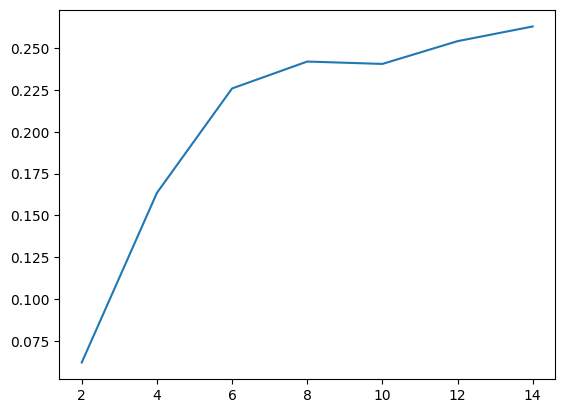

In [45]:
#END SALARY
krange=range(2,15,2)
plt.plot(krange,sclist)
sclist

In [47]:
for k in tqdm(range(15,30,4)):
    neigh = KNeighborsRegressor(n_neighbors=k)
    #neigh.fit(X_train, y_train)
    sc=cross_val_score(neigh , X_train_transform, y_train, cv=3).mean()
    sclist.append(sc)
sclist
# neigh.score(X_test, y_test )

100%|█████████████████████████████████████████████| 4/4 [03:10<00:00, 47.58s/it]


[0.06201419155605651,
 0.16347620028913656,
 0.2259556511306123,
 0.24205504144075532,
 0.24062762322737508,
 0.25424508729679884,
 0.2630322448327744,
 0.26846239805099364,
 0.2815241463975813,
 0.2881207807942673,
 0.2921732981538288]

In [58]:
# #END SALARY
# krange=range(15,30,4)
# plt.plot(krange,sclist)
# sclist

## Model with Start Salary + Encoding

In [51]:
X=df_testing[['Total_Year','Level', 'Career']]
y=df_testing['Start_Salary']

In [52]:
offset = int(X.shape[0] * 0.8)

X_train, y_train = X[:offset], y[:offset]
X_test, y_test = X[offset:], y[offset:]

In [53]:
X_train_transform=X_train.copy()
from sklearn.preprocessing import OneHotEncoder
enc_level = OneHotEncoder(handle_unknown='ignore',sparse=False)
enc_level.fit(X_train[['Level']])
level_cat=enc_level.categories_[0]
for x in range(len(level_cat)):
    X_train_transform[level_cat[x]]=enc_level.transform(X_train[['Level']]).T[x]
enc_career = OneHotEncoder(handle_unknown='ignore',sparse=False)
enc_career.fit(X_train[['Career']])
career_cat=enc_career.categories_[0]
for x in range(len(career_cat)):
    X_train_transform[career_cat[x]]=enc_career.transform(X_train[['Career']]).T[x]
X_train_transform=X_train_transform.drop(columns=['Level','Career'])
X_train_transform

,Total_Year,Manager,Other,Senior,Staff,Trainee,Accountant,Admin,Administ,Airport,...,Library,Mayor,Mechanic,Medical,Parking,Police,Public Works,Real Estate,Sicience,Transit
0,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
8,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
17,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206077,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
206083,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
206095,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
206096,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [54]:
X_test_transform=X_test.copy()
for x in range(len(level_cat)):
    X_test_transform[level_cat[x]]=enc_level.transform(X_test[['Level']]).T[x]
for x in range(len(career_cat)):
    X_test_transform[career_cat[x]]=enc_career.transform(X_test[['Career']]).T[x]
X_test_transform=X_test_transform.drop(columns=['Level','Career'])
X_test_transform

,Total_Year,Manager,Other,Senior,Staff,Trainee,Accountant,Admin,Administ,Airport,...,Library,Mayor,Mechanic,Medical,Parking,Police,Public Works,Real Estate,Sicience,Transit
206113,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
206114,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
206120,1,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
206124,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
206125,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259505,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
259506,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
259509,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
259510,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [55]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score
from tqdm import tqdm
sclist=[]
for k in tqdm(range(30,50)):
    neigh = KNeighborsRegressor(n_neighbors=k)
    #neigh.fit(X_train, y_train)
    sc=cross_val_score(neigh , X_train_transform, y_train, cv=3).mean()
    sclist.append(sc)
sclist
# neigh.score(X_test, y_test )

100%|███████████████████████████████████████████| 20/20 [01:32<00:00,  4.60s/it]


[0.25498308978898027,
 0.2589714287126164,
 0.2600787722267001,
 0.25498465505318063,
 0.2536042037772197,
 0.25427289161988825,
 0.2518002843910713,
 0.25740837940259176,
 0.2599779466837561,
 0.25908599330950843,
 0.2578061022329841,
 0.25703938104811247,
 0.25627301804396724,
 0.25495822435480825,
 0.25645950683534496,
 0.25680984441237176,
 0.2561461433227612,
 0.2588507374131239,
 0.25928384003240673,
 0.2588575917829559]

[0.25498308978898027,
 0.2589714287126164,
 0.2600787722267001,
 0.25498465505318063,
 0.2536042037772197,
 0.25427289161988825,
 0.2518002843910713,
 0.25740837940259176,
 0.2599779466837561,
 0.25908599330950843,
 0.2578061022329841,
 0.25703938104811247,
 0.25627301804396724,
 0.25495822435480825,
 0.25645950683534496,
 0.25680984441237176,
 0.2561461433227612,
 0.2588507374131239,
 0.25928384003240673,
 0.2588575917829559]

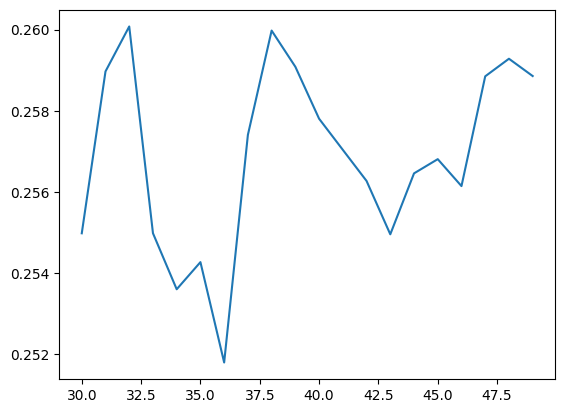

In [56]:
#END SALARY
krange=range(30,50)
plt.plot(krange,sclist)
sclist

In [ ]:
# # check tpot version
# import tpot
# from tpot import TPOTRegressor
# tpot = TPOTRegressor(generations=5, population_size=50, verbosity=2, random_state=42)
# tpot.fit(X_train_transform, y_train)
# print(tpot.score(X_test_transform, y_test))